# 의미론적 분할(Semantic Segmentation)이란?

![sementic-segmentation](./images/unet1.png)

U-Net은 컴퓨터 비전 영역에서 풀려고 하는 문제(task) 중 의미론적 분할(Semantic Segmentation)을 수행할 수 있는 모델이다. 

의미론적 분할이란 이미지 내에서 픽셀 단위로 분류하는 것이다.

즉, 각 픽셀별로 어떤 클래스에 속하는지를 예측하는 문제를 말한다.

이미지 내에 객체 존재 여부를 예측하는 문제(이미지 분류; Image Classification)에 비해서 객체 경계 정보를 보존해야하고,

전체적인 이미지의 문맥을 파악해야 하는 등 조금 더 높은 수준의 이미지 이해를 요구한다는 점에서 까다로운 문제에 속한다.

# UNet이란?

![unet](./images/unet2.png)

U-Net은 이미지를 압축하는 수축 경로(contracting path)와 원본 이미지의 크기로 복원하는 확장경로(expansive path)로 구성된다.

각 모듈을 인코더(Encoder), 디코더(Decoder)라고 부르고 모델의 구조가 U자 형태를 띄고 있다고 하여 U-Net으로 부른다. 

의미론적 분할을 수행하는 여러 모델들은 자율주행, 의생명공학 등 다양한 분야에 사용될 수 있다. 

U-Net은 MRI, CT 상에서 병변을 진단하거나 장기, 세포 조직 등을 분할하는 등 의료 영상(Biomedical) 분야에서 좋은 성능을 발휘하고 있고, 

U-Net 구조를 기반으로 한 모델들이 매년 다양한 문제를 더 잘 해결하는 모습을 보여주고 있다. 

paperwithcode에 따르면 U-Net이 해결하고 있는 문제의 10% 이상이 의료 분야와 관련되어 있고, 

의미론적 분할을 수행하는 모델 중 가장 많은 논문 수를 보유하고 있다.

의미론적 분할은 기계가 수행하기 어려운 고난도의 문제임에도 불구하고 해당 영역의 최신 모델(SOTA; state of the art)들은 꽤 높은 수준에 이른 것으로 확인된다.

paperwithcode에 따르면 의미론적 분할 영역에서 학습 및 테스트할 수 있는 대표적인 데이터셋인

Cityscapes test/val와 PASCAL VOC 2012 test/val에 대해서 벤치마크에서 1위를 달성한 모델들이 각각 84.5/86.95%, 90.5/90.0%의 mIoU(mean Intersection of Union)를 달성하였다. 

# overlap-tile 이란?

U-Net의 논문 제목 "U-Net: Convolutional Networks for Biomedical Image Segmentation"에서도 알 수 있듯이

U-Net은 의료 영상 이미지 분할을 위해 고안된 모델이다.
 
CT에서 혹의 위치를 찾거나(nodule detection) 배경으로부터 망막 혈관을 분할하는(retinal vessel segmentation) 등 병변을 진단하는데 도움이 줄 수 있다. 

일반적인 이미지와 다르게 의료공학 분야에서는 고해상도 이미지가 대부분이기 때문에 많은 연산량을 필요로 한다. 

고용량의 의료 이미지를 효율적으로 처리하기 위한 방안으로 overlap-tile 전략을 고안해냈다. 


![overlat-tile](./images/unet3.png)


노란색 영역, 즉 타일을 예측하게 되면 다음 타일로 넘어가는데 필요한 영역이 이전에 예측을 위해 사용했던 영역과 겹치게(overlap) 된다.

따라서 이 방법을 overlap-tile이라고 부른다. 

논문에서는 overlap-tile 전략은 "GPU 메모리가 한정되어 있을 때 큰 이미지들을 인공 신경망에 적용하는데 장점이 있다"고 말하고 있다. 



# 데이터 증폭이란?


 U-Net는 overlap-tile 이외에도 데이터 증폭이라는 방식을 사용하여 모델 학습을 수행합니다. 

의료 공학 분야에서는 훈련할 수 있는 이미지의 갯수가 적은 반면 조직의 변이나 변형이 매우 흔하기 때문에 확보한 데이터를 증폭하는 과정이 매우 중요하다고 합니다. 

데이터 증폭이란 확보한 이미지를 반전시키거나 회전, 뒤틀림, 이동시켜서 더 많은 양의 이미지를 확보하는 것을 의미합니다. 

U-Net 외에도 레이블링 비용 감소 등을 위해서 다른 모델에서도 데이터 증폭은 많이 사용되고 있습니다.


# 참고자료

 U-Net 논문, "U-Net: Convolutional Networks for Biomedical Image Segmentation(2015)" [Google Scholar]

# 손실함수 재정의

![weight-mat-loss](./images/unet4.png)

의료 이미지 분야에서 많은 세포들이 모여있는 경우, 즉 동일한 클래스가 인접해 있는 경우 분할하는데 많은 어려움을 겪는다. 

일반적인 세포와 배경을 구분하는 것은 쉽지만 위의 예시처럼 세포가 인접해있는 경우 각각의 인스턴스(instance)를 구분하는 것은 쉽지 않다. 

그래서 이 논문에서는 각 인스턴스의 경계와 경계 사이에 반드시 배경이 존재하도록 처리한다.

즉 2개의 세포가 붙어있는 경우라도 둘 사이에 반드시 배경이 인식되어야하는 틈을 만들겠다는 의미이다.

이를 고려하여 손실함수를 재정의 한다. 

weight map loss를 의미하는 항을 추가했는데 가장 가까운 세포의 경계까지의 거리와 두번째로 가까운 세포의 경계까지의 거리의 합이 최대가 되도록 하는 손실함수다. 

이렇게 하면 모델은 낮은 손실함수를 갖는 방향으로 학습하기 때문에 두 세포 사이의 간격을 넓히는 식, 즉 두 인스턴스 사이의 배경을 넓히는 방향으로 학습하게 된다. 

이렇게 하면 세포나 조직이 뭉쳐있는 경우에도 정확하게 인스턴스별로 분할이 가능하다. 

이런 의미에서 세포 객체들 사이에 존재하는 배경/틈에 높은 가중치가 부여된 것을 확인할 수 있다. 

# 데이터셋

![dataset](./images/unet5.png)

ISBI 2012 EM Segmentation Challenge에 사용된 membrane 데이터셋

왼쪽의 세포 이미지는 512x512(grayscale)이며, 오른쪽은 세포와 세포 사이의 벽(배경)을 분할한 모습이다.

실제 레이블된 값은 세포는 255, 배경은 1로 지정되어 있다.

```
dataset/
  train-volumne.tif # 훈련 이미지
  train-labels.tif # 훈련 이미지의 분할 레이블
  test-volumne.tif # 테스트 이미지
```

# Dataset

In [ ]:
dataset/
  train/
    input_000.npy ~ input_023.npy
    label_000.npy ~ label_023.npy
  val/
    input_000.npy ~ input_002.npy
    label_000.npy ~ label_002.npy
  test/
    input_000.npy ~ input_002.npy
    label_000.npy ~ label_002.npy

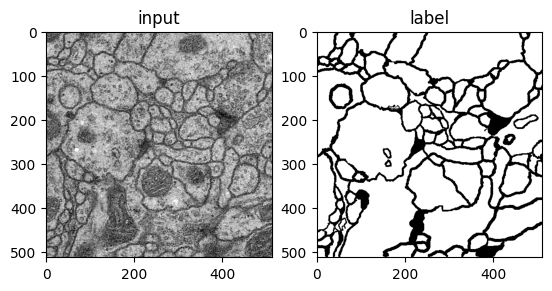

In [1]:
## 라이브러리 불러오기
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## 데이터 불러오기
dir_data = './dataset' 

name_label = 'train-labels.tif'
name_input = 'train-volume.tif'

img_label = Image.open(os.path.join(dir_data, name_label))
img_input = Image.open(os.path.join(dir_data, name_input))

ny, nx = img_label.size
nframe = img_label.n_frames

## train/test/val 폴더 생성
nframe_train = 24
nframe_val = 3
nframe_test = 3

dir_save_train = os.path.join(dir_data, 'train')
dir_save_val = os.path.join(dir_data, 'val')
dir_save_test = os.path.join(dir_data, 'test')

if not os.path.exists(dir_save_train):
    os.makedirs(dir_save_train)

if not os.path.exists(dir_save_val):
    os.makedirs(dir_save_val)

if not os.path.exists(dir_save_test):
    os.makedirs(dir_save_test)

## 전체 이미지 30개를 섞어줌
id_frame = np.arange(nframe)
np.random.shuffle(id_frame)

## 선택된 train 이미지를 npy 파일로 저장
offset_nframe = 0

for i in range(nframe_train):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_train, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_train, 'input_%03d.npy' % i), input_)

## 선택된 val 이미지를 npy 파일로 저장
offset_nframe = nframe_train

for i in range(nframe_val):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_val, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_val, 'input_%03d.npy' % i), input_)

## 선택된 test 이미지를 npy 파일로 저장
offset_nframe = nframe_train + nframe_val

for i in range(nframe_test):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_test, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_test, 'input_%03d.npy' % i), input_)

## 이미지 시각화
plt.subplot(122)
plt.imshow(label_, cmap='gray')
plt.title('label')

plt.subplot(121)
plt.imshow(input_, cmap='gray')
plt.title('input')

plt.show()

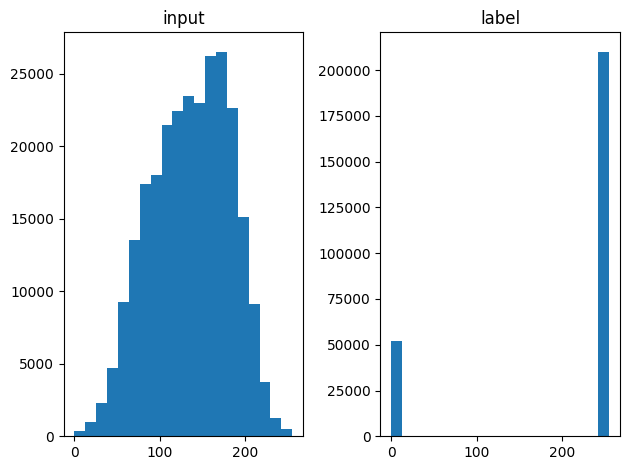

In [2]:
## 한 이미지의 분포
plt.subplot(122)
plt.hist(label_.flatten(), bins=20)
plt.title('label')

plt.subplot(121)
plt.hist(input_.flatten(), bins=20)
plt.title('input')

plt.tight_layout()
plt.show()

# UNet Network

In [3]:
## 라이브러리 불러오기
import os
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt

from torchvision import transforms, datasets

## 네트워크 구축하기
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Convolution + BatchNormalization + Relu 정의하기
        def CBR2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True): 
            layers = []
            layers += [nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                 kernel_size=kernel_size, stride=stride, padding=padding,
                                 bias=bias)]
            layers += [nn.BatchNorm2d(num_features=out_channels)]
            layers += [nn.ReLU()]

            cbr = nn.Sequential(*layers)

            return cbr

        # 수축 경로(Contracting path)
        self.enc1_1 = CBR2d(in_channels=1, out_channels=64)
        self.enc1_2 = CBR2d(in_channels=64, out_channels=64)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.enc2_1 = CBR2d(in_channels=64, out_channels=128)
        self.enc2_2 = CBR2d(in_channels=128, out_channels=128)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.enc3_1 = CBR2d(in_channels=128, out_channels=256)
        self.enc3_2 = CBR2d(in_channels=256, out_channels=256)

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.enc4_1 = CBR2d(in_channels=256, out_channels=512)
        self.enc4_2 = CBR2d(in_channels=512, out_channels=512)

        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.enc5_1 = CBR2d(in_channels=512, out_channels=1024)

        # 확장 경로(Expansive path)
        self.dec5_1 = CBR2d(in_channels=1024, out_channels=512)

        self.unpool4 = nn.ConvTranspose2d(in_channels=512, out_channels=512,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec4_2 = CBR2d(in_channels=2 * 512, out_channels=512)
        self.dec4_1 = CBR2d(in_channels=512, out_channels=256)

        self.unpool3 = nn.ConvTranspose2d(in_channels=256, out_channels=256,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec3_2 = CBR2d(in_channels=2 * 256, out_channels=256)
        self.dec3_1 = CBR2d(in_channels=256, out_channels=128)

        self.unpool2 = nn.ConvTranspose2d(in_channels=128, out_channels=128,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec2_2 = CBR2d(in_channels=2 * 128, out_channels=128)
        self.dec2_1 = CBR2d(in_channels=128, out_channels=64)

        self.unpool1 = nn.ConvTranspose2d(in_channels=64, out_channels=64,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec1_2 = CBR2d(in_channels=2 * 64, out_channels=64)
        self.dec1_1 = CBR2d(in_channels=64, out_channels=64)

        self.fc = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, stride=1, padding=0, bias=True)
    
    # forward 함수 정의하기
    def forward(self, x):
        enc1_1 = self.enc1_1(x)
        enc1_2 = self.enc1_2(enc1_1)
        pool1 = self.pool1(enc1_2)

        enc2_1 = self.enc2_1(pool1)
        enc2_2 = self.enc2_2(enc2_1)
        pool2 = self.pool2(enc2_2)

        enc3_1 = self.enc3_1(pool2)
        enc3_2 = self.enc3_2(enc3_1)
        pool3 = self.pool3(enc3_2)

        enc4_1 = self.enc4_1(pool3)
        enc4_2 = self.enc4_2(enc4_1)
        pool4 = self.pool4(enc4_2)

        enc5_1 = self.enc5_1(pool4)

        dec5_1 = self.dec5_1(enc5_1)

        unpool4 = self.unpool4(dec5_1)
        cat4 = torch.cat((unpool4, enc4_2), dim=1)
        dec4_2 = self.dec4_2(cat4)
        dec4_1 = self.dec4_1(dec4_2)

        unpool3 = self.unpool3(dec4_1)
        cat3 = torch.cat((unpool3, enc3_2), dim=1)
        dec3_2 = self.dec3_2(cat3)
        dec3_1 = self.dec3_1(dec3_2)

        unpool2 = self.unpool2(dec3_1)
        cat2 = torch.cat((unpool2, enc2_2), dim=1)
        dec2_2 = self.dec2_2(cat2)
        dec2_1 = self.dec2_1(dec2_2)

        unpool1 = self.unpool1(dec2_1)
        cat1 = torch.cat((unpool1, enc1_2), dim=1)
        dec1_2 = self.dec1_2(cat1)
        dec1_1 = self.dec1_1(dec1_2)

        x = self.fc(dec1_1)

        return x

C:\Users\pinb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Loader

In [4]:
# 데이터 로더를 구현하기
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform

        lst_data = os.listdir(self.data_dir)

        lst_label = [f for f in lst_data if f.startswith('label')]
        lst_input = [f for f in lst_data if f.startswith('input')]

        lst_label.sort()
        lst_input.sort()

        self.lst_label = lst_label
        self.lst_input = lst_input

    def __len__(self):
        return len(self.lst_label)

    def __getitem__(self, index):
        label = np.load(os.path.join(self.data_dir, self.lst_label[index]))
        input = np.load(os.path.join(self.data_dir, self.lst_input[index]))

        # 정규화
        label = label/255.0
        input = input/255.0

        # 이미지와 레이블의 차원 = 2일 경우(채널이 없을 경우, 흑백 이미지), 새로운 채널(축) 생성
        if label.ndim == 2:
            label = label[:, :, np.newaxis]
        if input.ndim == 2:
            input = input[:, :, np.newaxis]

        data = {'input': input, 'label': label}

        # transform이 정의되어 있다면 transform을 거친 데이터를 불러옴
        if self.transform:
            data = self.transform(data)

        return data

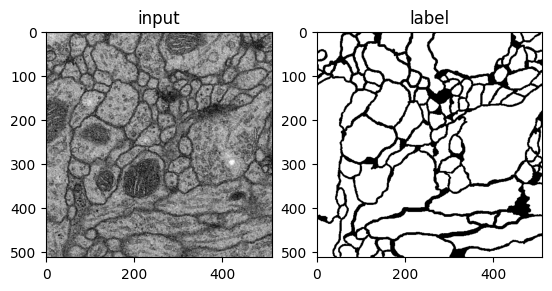

In [5]:
# 데이터로더 잘 구현되었는지 확인
dataset_train = Dataset(data_dir=dir_save_train)
data = dataset_train.__getitem__(0) # 한 이미지 불러오기
input = data['input']
label = data['label']

# 불러온 이미지 시각화
plt.subplot(122)
plt.imshow(label.reshape(512,512), cmap='gray')
plt.title('label')

plt.subplot(121)
plt.imshow(input.reshape(512,512), cmap='gray')
plt.title('input')

plt.show()

# Transform

In [6]:
# 트렌스폼 구현하기
class ToTensor(object):
    def __call__(self, data):
        label, input = data['label'], data['input']

        label = label.transpose((2, 0, 1)).astype(np.float32)
        input = input.transpose((2, 0, 1)).astype(np.float32)

        data = {'label': torch.from_numpy(label), 'input': torch.from_numpy(input)}

        return data

class Normalization(object):
    def __init__(self, mean=0.5, std=0.5):
        self.mean = mean
        self.std = std

    def __call__(self, data):
        label, input = data['label'], data['input']

        input = (input - self.mean) / self.std

        data = {'label': label, 'input': input}

        return data

class RandomFlip(object):
    def __call__(self, data):
        label, input = data['label'], data['input']

        if np.random.rand() > 0.5:
            label = np.fliplr(label)
            input = np.fliplr(input)

        if np.random.rand() > 0.5:
            label = np.flipud(label)
            input = np.flipud(input)

        data = {'label': label, 'input': input}

        return data

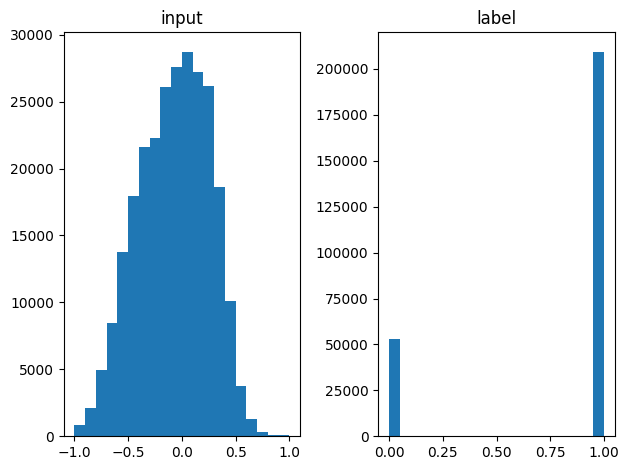

In [7]:
# 트랜스폼 잘 구현되었는지 확인
transform = transforms.Compose([Normalization(mean=0.5, std=0.5), RandomFlip(), ToTensor()])
dataset_train = Dataset(data_dir=dir_save_train, transform=transform)
data = dataset_train.__getitem__(0) # 한 이미지 불러오기
input = data['input']
label = data['label']

# 불러온 이미지 시각화
plt.subplot(122)
plt.hist(label.flatten(), bins=20)
plt.title('label')

plt.subplot(121)
plt.hist(input.flatten(), bins=20)
plt.title('input')

plt.tight_layout()
plt.show()

# Model Save / Load

In [8]:
## 네트워크 저장하기
def save(ckpt_dir, net, optim, epoch):
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)

    torch.save({'net': net.state_dict(), 'optim': optim.state_dict()},
               "%s/model_epoch%d.pth" % (ckpt_dir, epoch))

## 네트워크 불러오기
def load(ckpt_dir, net, optim):
    if not os.path.exists(ckpt_dir):
        epoch = 0
        return net, optim, epoch

    ckpt_lst = os.listdir(ckpt_dir)
    ckpt_lst.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

    dict_model = torch.load('%s/%s' % (ckpt_dir, ckpt_lst[-1]))

    net.load_state_dict(dict_model['net'])
    optim.load_state_dict(dict_model['optim'])
    epoch = int(ckpt_lst[-1].split('epoch')[1].split('.pth')[0])

    return net, optim, epoch

# Train

In [10]:
# 훈련 파라미터 설정하기
lr = 1e-3
batch_size = 4
num_epoch = 20

base_dir = './drive/MyDrive/DACrew/unet'
data_dir = dir_data
ckpt_dir = os.path.join(base_dir, "checkpoint")
log_dir = os.path.join(base_dir, "log")


# 훈련을 위한 Transform과 DataLoader
transform = transforms.Compose([Normalization(mean=0.5, std=0.5), RandomFlip(), ToTensor()])

dataset_train = Dataset(data_dir=os.path.join(data_dir, 'train'), transform=transform)
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=0)

dataset_val = Dataset(data_dir=os.path.join(data_dir, 'val'), transform=transform)
loader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False, num_workers=0)

# 네트워크 생성하기
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = UNet().to(device)

# 손실함수 정의하기
fn_loss = nn.BCEWithLogitsLoss().to(device)

# Optimizer 설정하기
optim = torch.optim.Adam(net.parameters(), lr=lr)

# 그밖에 부수적인 variables 설정하기
num_data_train = len(dataset_train)
num_data_val = len(dataset_val)

num_batch_train = np.ceil(num_data_train / batch_size)
num_batch_val = np.ceil(num_data_val / batch_size)

# 그 밖에 부수적인 functions 설정하기
fn_tonumpy = lambda x: x.to('cpu').detach().numpy().transpose(0, 2, 3, 1)
fn_denorm = lambda x, mean, std: (x * std) + mean
fn_class = lambda x: 1.0 * (x > 0.5)

# Tensorboard 를 사용하기 위한 SummaryWriter 설정
writer_train = SummaryWriter(log_dir=os.path.join(log_dir, 'train'))
writer_val = SummaryWriter(log_dir=os.path.join(log_dir, 'val'))

# 네트워크 학습시키기
st_epoch = 0
# 학습한 모델이 있을 경우 모델 로드하기
net, optim, st_epoch = load(ckpt_dir=ckpt_dir, net=net, optim=optim) 

for epoch in range(st_epoch + 1, num_epoch + 1):
        net.train()
        loss_arr = []

        for batch, data in enumerate(loader_train, 1):
            # forward pass
            label = data['label'].to(device)
            input = data['input'].to(device)

            output = net(input)

            # backward pass
            optim.zero_grad()

            loss = fn_loss(output, label)
            loss.backward()

            optim.step()

            # 손실함수 계산
            loss_arr += [loss.item()]

            print("TRAIN: EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f" %
                  (epoch, num_epoch, batch, num_batch_train, np.mean(loss_arr)))

            # Tensorboard 저장하기
            label = fn_tonumpy(label)
            input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
            output = fn_tonumpy(fn_class(output))

            writer_train.add_image('label', label, num_batch_train * (epoch - 1) + batch, dataformats='NHWC')
            writer_train.add_image('input', input, num_batch_train * (epoch - 1) + batch, dataformats='NHWC')
            writer_train.add_image('output', output, num_batch_train * (epoch - 1) + batch, dataformats='NHWC')

        writer_train.add_scalar('loss', np.mean(loss_arr), epoch)

        with torch.no_grad():
            net.eval()
            loss_arr = []

            for batch, data in enumerate(loader_val, 1):
                # forward pass
                label = data['label'].to(device)
                input = data['input'].to(device)

                output = net(input)

                # 손실함수 계산하기
                loss = fn_loss(output, label)

                loss_arr += [loss.item()]

                print("VALID: EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f" %
                      (epoch, num_epoch, batch, num_batch_val, np.mean(loss_arr)))

                # Tensorboard 저장하기
                label = fn_tonumpy(label)
                input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
                output = fn_tonumpy(fn_class(output))

                writer_val.add_image('label', label, num_batch_val * (epoch - 1) + batch, dataformats='NHWC')
                writer_val.add_image('input', input, num_batch_val * (epoch - 1) + batch, dataformats='NHWC')
                writer_val.add_image('output', output, num_batch_val * (epoch - 1) + batch, dataformats='NHWC')

        writer_val.add_scalar('loss', np.mean(loss_arr), epoch)

        # epoch 50마다 모델 저장하기
        if epoch % 50 == 0:
            save(ckpt_dir=ckpt_dir, net=net, optim=optim, epoch=epoch)

        writer_train.close()
        writer_val.close()

TRAIN: EPOCH 0001 / 0020 | BATCH 0001 / 0006 | LOSS 0.6337
TRAIN: EPOCH 0001 / 0020 | BATCH 0002 / 0006 | LOSS 0.5923
TRAIN: EPOCH 0001 / 0020 | BATCH 0003 / 0006 | LOSS 0.5694
TRAIN: EPOCH 0001 / 0020 | BATCH 0004 / 0006 | LOSS 0.5456
TRAIN: EPOCH 0001 / 0020 | BATCH 0005 / 0006 | LOSS 0.5214
TRAIN: EPOCH 0001 / 0020 | BATCH 0006 / 0006 | LOSS 0.5036
VALID: EPOCH 0001 / 0020 | BATCH 0001 / 0001 | LOSS 0.6128
TRAIN: EPOCH 0002 / 0020 | BATCH 0001 / 0006 | LOSS 0.4027
TRAIN: EPOCH 0002 / 0020 | BATCH 0002 / 0006 | LOSS 0.3897
TRAIN: EPOCH 0002 / 0020 | BATCH 0003 / 0006 | LOSS 0.3905
TRAIN: EPOCH 0002 / 0020 | BATCH 0004 / 0006 | LOSS 0.3856
TRAIN: EPOCH 0002 / 0020 | BATCH 0005 / 0006 | LOSS 0.3807
TRAIN: EPOCH 0002 / 0020 | BATCH 0006 / 0006 | LOSS 0.3745
VALID: EPOCH 0002 / 0020 | BATCH 0001 / 0001 | LOSS 0.5134
TRAIN: EPOCH 0003 / 0020 | BATCH 0001 / 0006 | LOSS 0.3422
TRAIN: EPOCH 0003 / 0020 | BATCH 0002 / 0006 | LOSS 0.3350
TRAIN: EPOCH 0003 / 0020 | BATCH 0003 / 0006 | LOSS 0.33

# Test

In [12]:
transform = transforms.Compose([Normalization(mean=0.5, std=0.5), ToTensor()])

dataset_test = Dataset(data_dir=os.path.join(data_dir, 'test'), transform=transform)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, num_workers=0)

# 그밖에 부수적인 variables 설정하기
num_data_test = len(dataset_test)
num_batch_test = np.ceil(num_data_test / batch_size)

# 결과 디렉토리 생성하기
result_dir = os.path.join(base_dir, 'result')
if not os.path.exists(result_dir):
    os.makedirs(os.path.join(result_dir, 'png'))
    os.makedirs(os.path.join(result_dir, 'numpy'))


net, optim, st_epoch = load(ckpt_dir=ckpt_dir, net=net, optim=optim)

with torch.no_grad():
      net.eval()
      loss_arr = []

      for batch, data in enumerate(loader_test, 1):
          # forward pass
          label = data['label'].to(device)
          input = data['input'].to(device)

          output = net(input)

          # 손실함수 계산하기
          loss = fn_loss(output, label)

          loss_arr += [loss.item()]

          print("TEST: BATCH %04d / %04d | LOSS %.4f" %
                (batch, num_batch_test, np.mean(loss_arr)))

          # Tensorboard 저장하기
          label = fn_tonumpy(label)
          input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
          output = fn_tonumpy(fn_class(output))

          # 테스트 결과 저장하기
          for j in range(label.shape[0]):
              id = num_batch_test * (batch - 1) + j

              plt.imsave(os.path.join(result_dir, 'png', 'label_%04d.png' % id), label[j].squeeze(), cmap='gray')
              plt.imsave(os.path.join(result_dir, 'png', 'input_%04d.png' % id), input[j].squeeze(), cmap='gray')
              plt.imsave(os.path.join(result_dir, 'png', 'output_%04d.png' % id), output[j].squeeze(), cmap='gray')

              np.save(os.path.join(result_dir, 'numpy', 'label_%04d.npy' % id), label[j].squeeze())
              np.save(os.path.join(result_dir, 'numpy', 'input_%04d.npy' % id), input[j].squeeze())
              np.save(os.path.join(result_dir, 'numpy', 'output_%04d.npy' % id), output[j].squeeze())

print("AVERAGE TEST: BATCH %04d / %04d | LOSS %.4f" %
        (batch, num_batch_test, np.mean(loss_arr)))

TEST: BATCH 0001 / 0001 | LOSS 0.2526
AVERAGE TEST: BATCH 0001 / 0001 | LOSS 0.2526


# Result (Visualize)

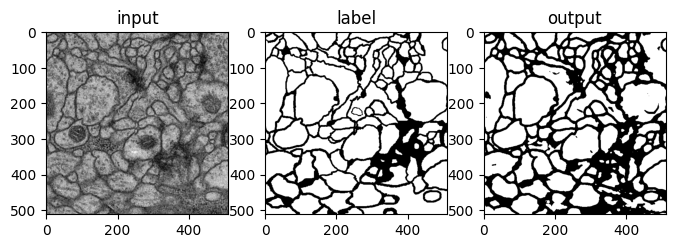

In [13]:
##
lst_data = os.listdir(os.path.join(result_dir, 'numpy'))

lst_label = [f for f in lst_data if f.startswith('label')]
lst_input = [f for f in lst_data if f.startswith('input')]
lst_output = [f for f in lst_data if f.startswith('output')]

lst_label.sort()
lst_input.sort()
lst_output.sort()

##
id = 0

label = np.load(os.path.join(result_dir,"numpy", lst_label[id]))
input = np.load(os.path.join(result_dir,"numpy", lst_input[id]))
output = np.load(os.path.join(result_dir,"numpy", lst_output[id]))

## 플롯 그리기
plt.figure(figsize=(8,6))
plt.subplot(131)
plt.imshow(input, cmap='gray')
plt.title('input')

plt.subplot(132)
plt.imshow(label, cmap='gray')
plt.title('label')

plt.subplot(133)
plt.imshow(output, cmap='gray')
plt.title('output')

plt.show()